In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

593

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9077f397cb8a1391689922c8104c8fff


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.

Processing Record 1 of Set 12 | sentyabrskiy
Processing Record 2 of Set 12 | busselton
Processing Record 3 of Set 12 | tasiilaq
Processing Record 4 of Set 12 | hobart
Processing Record 5 of Set 12 | kruisfontein
Processing Record 6 of Set 12 | punta arenas
Processing Record 7 of Set 12 | longyearbyen
Processing Record 8 of Set 12 | kitale
Processing Record 9 of Set 12 | keelung
Processing Record 10 of Set 12 | saskylakh
Processing Record 11 of Set 12 | victoria
Processing Record 12 of Set 12 | sitka
Processing Record 13 of Set 12 | hamilton
Processing Record 14 of Set 12 | fare
Processing Record 15 of Set 12 | la primavera
Processing Record 16 of Set 12 | farah
Processing Record 17 of Set 12 | ranong
Processing Record 18 of Set 12 | baracoa
Processing Record 19 of Set 12 | nanortalik
Processing Record 20 of Set 12 | tuktoyaktuk
Processing Record 21 of Set 12 | coihaique
Processing Record 22 of Set 12 | vaini
Processing Record 23 of Set 12 | ugoofaaru
Processing Record 24 of Set 12 | me

In [12]:
try:
    # Parse the JSON and retrieve data.
    city_weather = requests.get(city_url).json()
    # Parse out the needed data.
    city_lat = city_weather["coord"]["lat"]
    city_lng = city_weather["coord"]["lon"]
    city_max_temp = city_weather["main"]["temp_max"]
    city_humidity = city_weather["main"]["humidity"]
    city_clouds = city_weather["clouds"]["all"]
    city_wind = city_weather["wind"]["speed"]
    city_country = city_weather["sys"]["country"]
    # Convert the date to ISO standard.
    city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
    # Append the city information into city_data list.
    city_data.append({"City": city.title(),
                      "Lat": city_lat,
                      "Lng": city_lng,
                      "Max Temp": city_max_temp,
                      "Humidity": city_humidity,
                      "Cloudiness": city_clouds,
                      "Wind Speed": city_wind,
                      "Country": city_country,
                      "Date": city_date})

# If an error is experienced, skip the city.
except:
    print("City not found. Skipping...")
    pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

-----------------------------
Data Retrieval Complete      
-----------------------------


In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | sentyabrskiy
City not found. Skipping...
Processing Record 2 of Set 12 | busselton
Processing Record 3 of Set 12 | tasiilaq
Processing Record 4 of Set 12 | hobart
Processing Record 5 of Set 12 | kruisfontein
Processing Record 6 of Set 12 | punta arenas
Processing Record 7 of Set 12 | longyearbyen
Processing Record 8 of Set 12 | kitale
Processing Record 9 of Set 12 | keelung
Processing Record 10 of Set 12 | saskylakh
Processing Record 11 of Set 12 | victoria
Processing Record 12 of Set 12 | sitka
Processing Record 13 of Set 12 | hamilton
Processing Record 14 of Set 12 | fare
Processing Record 15 of Set 12 | la primavera
Processing Record 16 of Set 12 | farah
Processing Record 17 of Set 12 | ranong
Processing Record 18 of Set 12 | baracoa
Processing Record 19 of Set 12 | nanortalik
Processing Record 20 of Set 12 | tuktoyaktuk
Processing Record 21 of Set 12 | coihaique
Processing Record 22 of Set 1

Processing Record 37 of Set 15 | lima
Processing Record 38 of Set 15 | hihifo
City not found. Skipping...
Processing Record 39 of Set 15 | bengkulu
Processing Record 40 of Set 15 | pokhara
Processing Record 41 of Set 15 | fortuna
Processing Record 42 of Set 15 | sola
Processing Record 43 of Set 15 | ciro marina
Processing Record 44 of Set 15 | castro
Processing Record 45 of Set 15 | tukrah
Processing Record 46 of Set 15 | esperance
Processing Record 47 of Set 15 | balkhash
Processing Record 48 of Set 15 | broome
Processing Record 49 of Set 15 | santa maria
Processing Record 50 of Set 15 | tibati
Processing Record 1 of Set 16 | nola
Processing Record 2 of Set 16 | bluff
Processing Record 3 of Set 16 | attawapiskat
City not found. Skipping...
Processing Record 4 of Set 16 | drumheller
Processing Record 5 of Set 16 | torbat-e jam
Processing Record 6 of Set 16 | whakatane
Processing Record 7 of Set 16 | bara
Processing Record 8 of Set 16 | illoqqortoormiut
City not found. Skipping...
Proce

Processing Record 22 of Set 19 | muros
Processing Record 23 of Set 19 | krasnoselkup
Processing Record 24 of Set 19 | umzimvubu
City not found. Skipping...
Processing Record 25 of Set 19 | samusu
City not found. Skipping...
Processing Record 26 of Set 19 | aykhal
Processing Record 27 of Set 19 | ballina
Processing Record 28 of Set 19 | santa isabel do rio negro
Processing Record 29 of Set 19 | kamenskoye
City not found. Skipping...
Processing Record 30 of Set 19 | perth
Processing Record 31 of Set 19 | sulangan
Processing Record 32 of Set 19 | harper
Processing Record 33 of Set 19 | la rioja
Processing Record 34 of Set 19 | lushunkou
City not found. Skipping...
Processing Record 35 of Set 19 | alice springs
Processing Record 36 of Set 19 | the pas
Processing Record 37 of Set 19 | yenagoa
Processing Record 38 of Set 19 | ayan
Processing Record 39 of Set 19 | lisakovsk
Processing Record 40 of Set 19 | san andres
Processing Record 41 of Set 19 | meyungs
City not found. Skipping...
Process

Processing Record 10 of Set 23 | nombre de dios
Processing Record 11 of Set 23 | hami
Processing Record 12 of Set 23 | lloydminster
Processing Record 13 of Set 23 | sistranda
Processing Record 14 of Set 23 | loreto
Processing Record 15 of Set 23 | tabou
Processing Record 16 of Set 23 | tieling
Processing Record 17 of Set 23 | bandarbeyla
Processing Record 18 of Set 23 | byron bay
Processing Record 19 of Set 23 | rio grande
Processing Record 20 of Set 23 | matamoros
Processing Record 21 of Set 23 | xichang
Processing Record 22 of Set 23 | rio gallegos
Processing Record 23 of Set 23 | inhambane
Processing Record 24 of Set 23 | palu
Processing Record 25 of Set 23 | bell ville
Processing Record 26 of Set 23 | oranjestad
Processing Record 27 of Set 23 | grindavik
Processing Record 28 of Set 23 | ust-kulom
Processing Record 29 of Set 23 | biak
Processing Record 30 of Set 23 | port pirie
Processing Record 31 of Set 23 | lahaina
Processing Record 32 of Set 23 | okha
Processing Record 33 of Set

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.65,115.33,44.01,85,2,8.19,AU,2020-07-09 16:36:54
1,Tasiilaq,65.61,-37.64,53.60,46,40,19.46,GL,2020-07-09 16:36:54
2,Hobart,-42.88,147.33,39.00,100,0,5.82,AU,2020-07-09 16:36:26
3,Kruisfontein,-34.00,24.73,61.29,55,45,15.14,ZA,2020-07-09 16:32:46
4,Punta Arenas,-53.15,-70.92,35.60,74,75,23.04,CL,2020-07-09 16:36:54
5,Longyearbyen,78.22,15.64,48.20,76,75,12.75,SJ,2020-07-09 16:35:41
6,Kitale,1.02,35.01,57.67,91,17,1.50,KE,2020-07-09 16:36:55
7,Keelung,25.13,121.74,87.01,84,75,4.70,TW,2020-07-09 16:36:55
8,Saskylakh,71.92,114.08,47.98,70,58,11.03,RU,2020-07-09 16:36:55
9,Victoria,22.29,114.16,86.00,74,100,11.01,HK,2020-07-09 16:36:55


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df.reindex(columns = new_column_order)
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2020-07-09 16:36:54,-33.65,115.33,44.01,85,2,8.19
1,Tasiilaq,GL,2020-07-09 16:36:54,65.61,-37.64,53.60,46,40,19.46
2,Hobart,AU,2020-07-09 16:36:26,-42.88,147.33,39.00,100,0,5.82
3,Kruisfontein,ZA,2020-07-09 16:32:46,-34.00,24.73,61.29,55,45,15.14
4,Punta Arenas,CL,2020-07-09 16:36:54,-53.15,-70.92,35.60,74,75,23.04
5,Longyearbyen,SJ,2020-07-09 16:35:41,78.22,15.64,48.20,76,75,12.75
6,Kitale,KE,2020-07-09 16:36:55,1.02,35.01,57.67,91,17,1.50
7,Keelung,TW,2020-07-09 16:36:55,25.13,121.74,87.01,84,75,4.70
8,Saskylakh,RU,2020-07-09 16:36:55,71.92,114.08,47.98,70,58,11.03
9,Victoria,HK,2020-07-09 16:36:55,22.29,114.16,86.00,74,100,11.01


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'07/09/20'

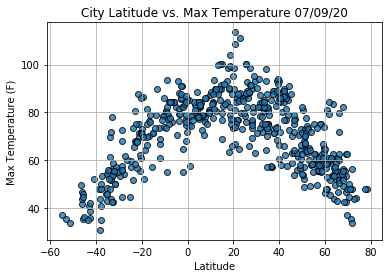

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

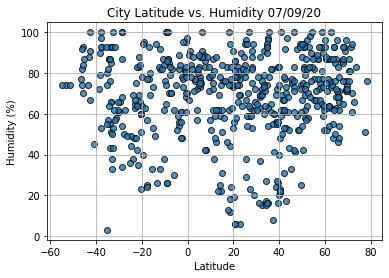

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

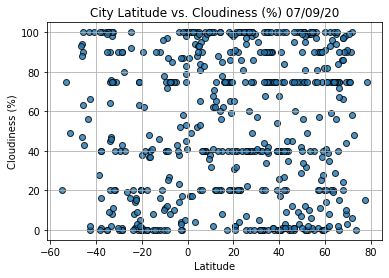

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

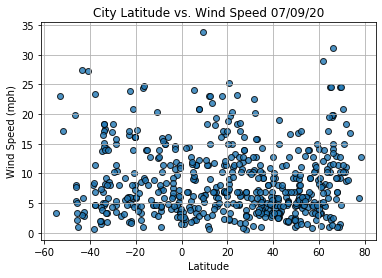

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Tasiilaq,GL,2020-07-09 16:36:54,65.61,-37.64,53.60,46,40,19.46
5,Longyearbyen,SJ,2020-07-09 16:35:41,78.22,15.64,48.20,76,75,12.75
6,Kitale,KE,2020-07-09 16:36:55,1.02,35.01,57.67,91,17,1.50
7,Keelung,TW,2020-07-09 16:36:55,25.13,121.74,87.01,84,75,4.70
8,Saskylakh,RU,2020-07-09 16:36:55,71.92,114.08,47.98,70,58,11.03


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

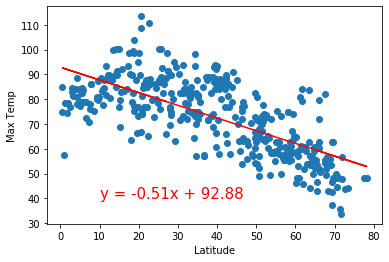

In [28]:
# Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere
# Linear regression on the Nothern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere\n for Maximum Temperature', 'Max Temp', (10,40))

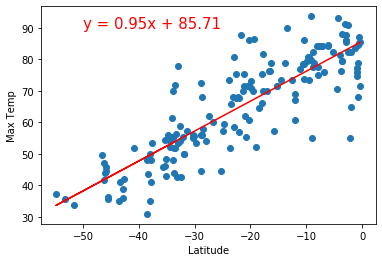

In [29]:
# Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere
# Linear regression on the Nothern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere\n for Maximum Temperature', 'Max Temp', (-50,90))

In [30]:
#Findings- Find the Correlation Between Latitude and Maximum Temperature:
# The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from the equator the temperatures become cooler. Check the r-values for your plots. 

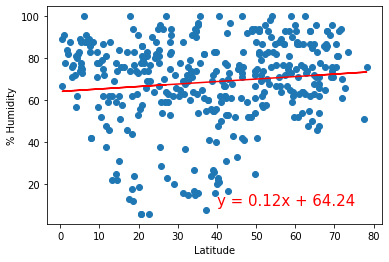

In [31]:
# Perform Linear Regression on the Percent Humidity for the Northern Hemisphere
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

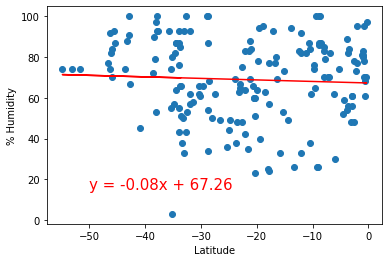

In [32]:
# Perform Linear Regression on the Percent Humidity for the Southern Hemisphere
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

In [33]:
# Findings - Find the Correlation Between Latitude and Percent Humidity:
# The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 for the Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to changing weather patterns that can increase or decrease percent humidity. Check the r-values for your plots. 

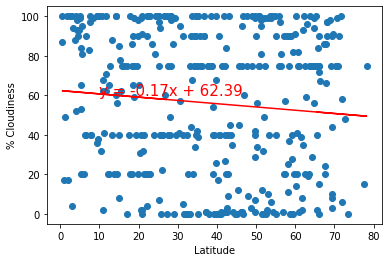

In [34]:
# Skill drill 6.4.4 - Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere
# Linear regression on the Nothern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Nothern Hemisphere\n for % Cloudiness', '% Cloudiness', (10,60))

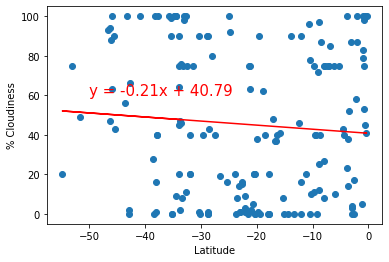

In [35]:
# Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

In [36]:
# Findings - Find the Correlation Between Latitude and Percent Cloudiness:
#The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09 for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness. Check the r-values for your plots. 

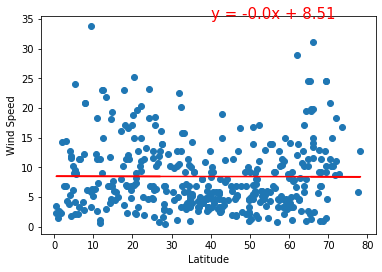

In [37]:
# Perform Linear Regression on the Wind Speed for the Northern Hemisphere
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

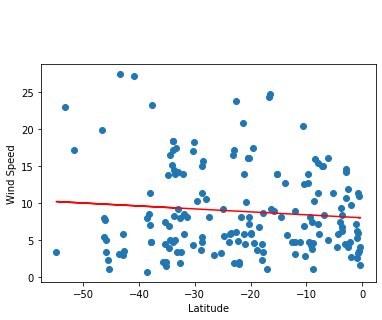

In [38]:
# Perform Linear Regression on the Wind Speed for the Southern Hemisphere
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,  'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))
#plt.ylim(0,40)

In [39]:
# Findings - Find the Correlation Between Latitude and Wind Speed
# The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for the Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here . This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed. Check the r-values for your plots. 